# The Sparks Foundation, Singapore : Data Science & Business Analytics Internship

**Raghvendra Pratap Singh**

**Task 2:** Prediction using Un-supervised ML

**Data Source:** https://bit.ly/3kXTdox

**Problem statement:** predict the optimum number of  clusters and represent it visually.

In [62]:
# Importing the libraries
import numpy as np
import pandas as pd

In [63]:
df = pd.read_csv("6 Task 2 Iris data - unsupervised ML.csv")

In [64]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


reference:
    
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

**Label Encoding**

In [65]:
#from sklearn import preprocessing
df['SpeciesLabel'] = pd.Categorical(df["Species"])

In [66]:
#le = preprocessing.LabelEncoder()
df['SpeciesLabel'] = df["SpeciesLabel"].cat.codes

In [67]:
#df['SpeciesLabel'] = le.fit_transform(df['Species'])

In [68]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class,SpeciesLabel
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [69]:
import matplotlib.pyplot as plt

In [70]:
x = df.iloc[:, [ 1, 2, 3, 4]].values ## we have selected columns 2 to 5 of the dataframe

In [71]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
x.shape

(150, 4)

**Plotting before KMeans**

Text(0, 0.5, 'Sepal Width')

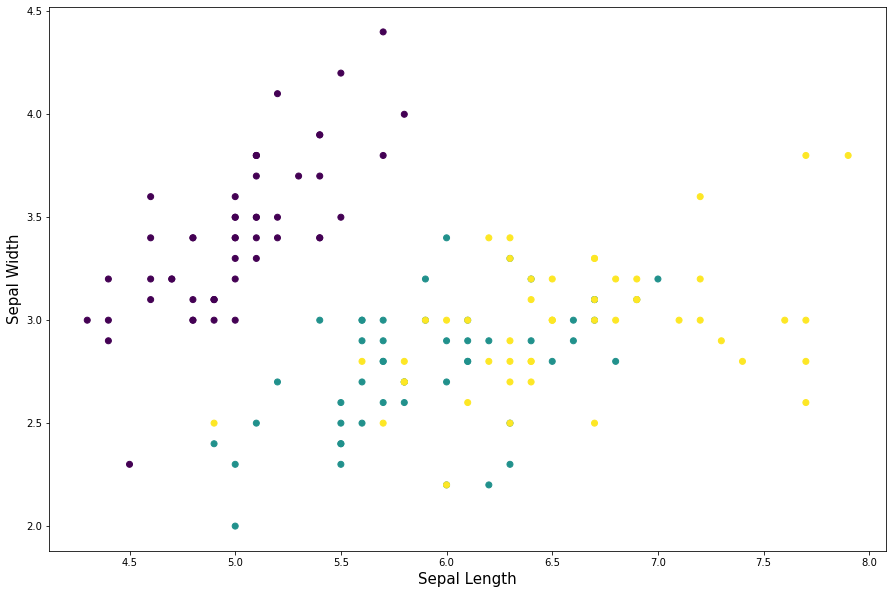

In [73]:
plt.figure(figsize=(15,10))
plt.scatter(x[:,0], x[:,1], c=df.Class)
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)

Text(0, 0.5, 'Petal Width')

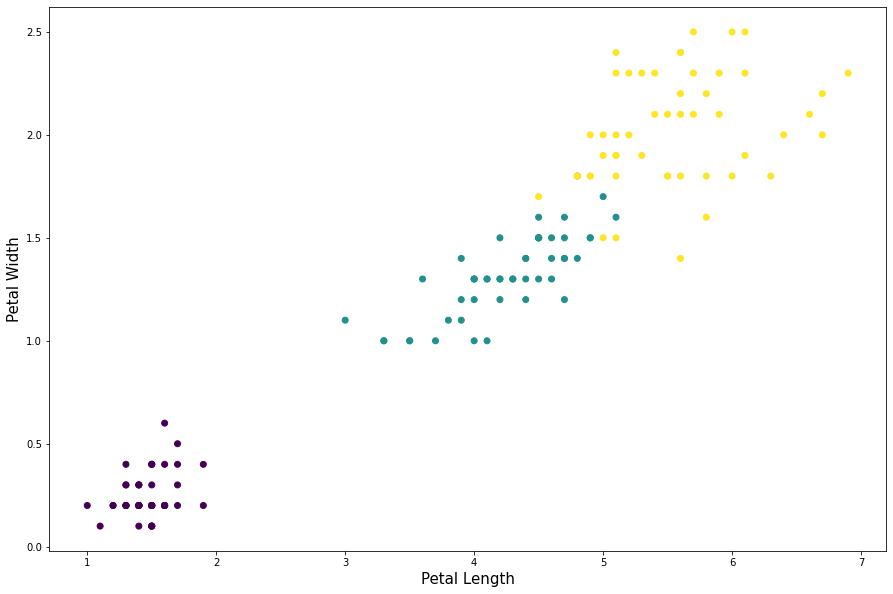

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(x[:,2], x[:,3], c=df.Class)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)

In [75]:
from sklearn.cluster import KMeans

**optimum number of clusters for K Means**

In [76]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

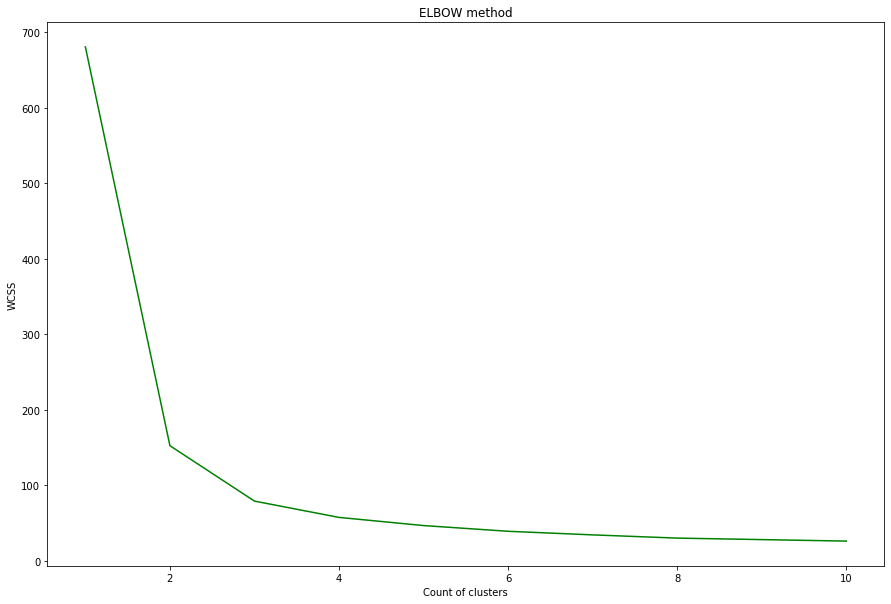

In [77]:
# a line graph to visualize ELBOW

plt.figure(figsize=(15,10))
plt.plot(range(1, 11), wcss, c='g')
plt.title('ELBOW method')
plt.xlabel('Count of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From this we choose the number of clusters as ** '3**'.

In [78]:
# Applying kmeans to the dataset / Creating the kmeans classifier
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)

kmeans1 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
#kmeans = KMeans(n_clusters = 3)
kmeans1 = kmeans1.fit(x)
kmeans1

C:\Users\Raghvendra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Raghvendra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=1, precompute_distances='auto', random_state=10)

In [79]:
kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [81]:
target_predicted = np.choose(kmeans1.labels_,[1,0,2]).astype(np.int64)

In [82]:
target_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [86]:
# Getting the cluster labels
y_kmeans = kmeans1.predict(x)

#y_kmeans = kmeans.fit_predict(x)

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(df.Class, target_predicted))
confusion_matrix(df.Class, target_predicted)

0.8933333333333333


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

**Sepal Length VS Sepal Width**

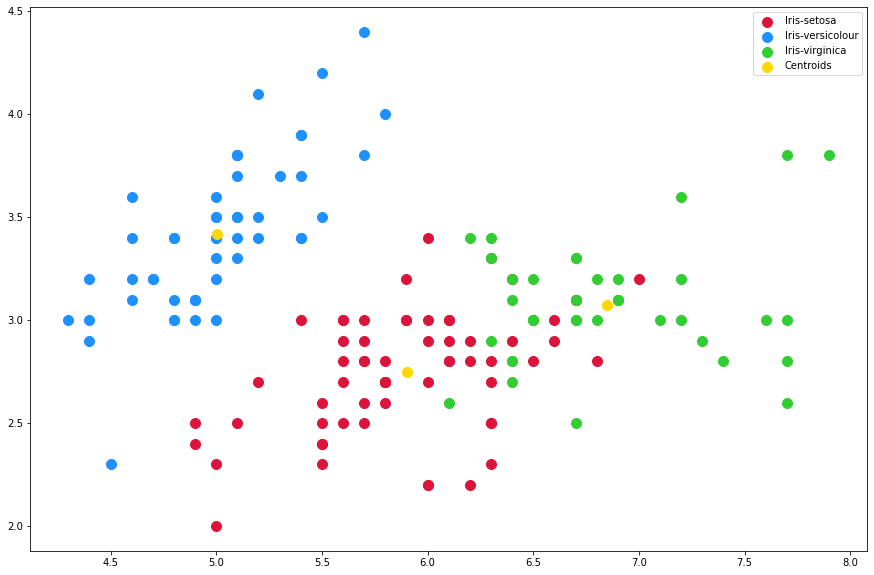

In [89]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'crimson', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'dodgerblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'limegreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:,1],s = 100, c = 'gold', label = 'Centroids')

plt.legend()

**Petal Length VS Petal Width**

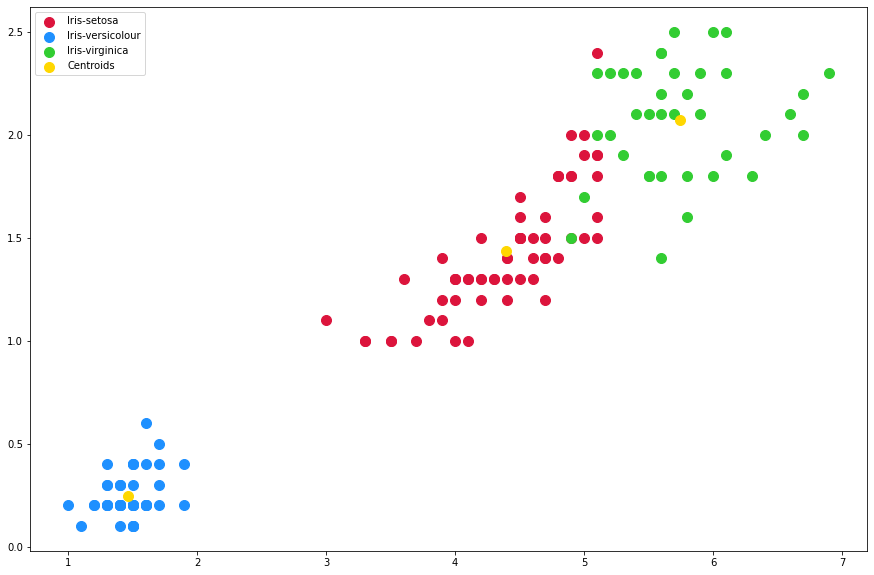

In [90]:
# Visualising the clusters - On the other two columns
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'crimson', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'dodgerblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'limegreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans1.cluster_centers_[:, 2], kmeans1.cluster_centers_[:,3],s = 100, c = 'gold', label = 'Centroids')

plt.legend()